
### 5. Exploratory Data Analysis
In this step, I dove into the cleaned and feature-enhanced data to uncover patterns and insights:

- **Univariate Distributions**: I plotted histograms of player ages and boxplots of market value by position to see how age and role influence value.
- **Bivariate Relationships**: I created a scatter plot of price vs. age and a correlation heatmap of key numeric features to explore how variables interact.
- **Key Insights**: Within the notebook, I noted observations such as the age range where valuations peak, positional value trends, and the strength of relationships between tenure and market value.

All of this is organized in a Jupyter notebook (`notebooks/04_exploratory_analysis.ipynb`) that contains code cells, visual outputs, and markdown commentary.


In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the feature‐enhanced data
df = pd.read_csv('../data/processed/players_features.csv',
                 parse_dates=['joined_club','contract_expires'])


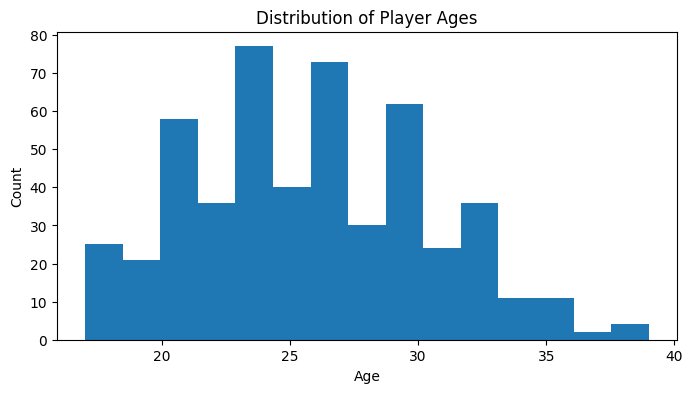

In [12]:
plt.figure(figsize=(8,4))
plt.hist(df['age'], bins=15)
plt.title("Distribution of Player Ages")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()


Figure 1. Distribution of Player Ages 
This shows how many players fall into each age bracket. In soccer terms, it highlights where most careers are concentrated (e.g. prime years vs. youth or veterans)

-I noticed how players aged 24–26 dominate the top quantiles of market value.

/var/folders/dd/l05_zbd51d7211wc0xh8v9b00000gn/T/ipykernel_33344/1780346555.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=positions, showfliers=False)


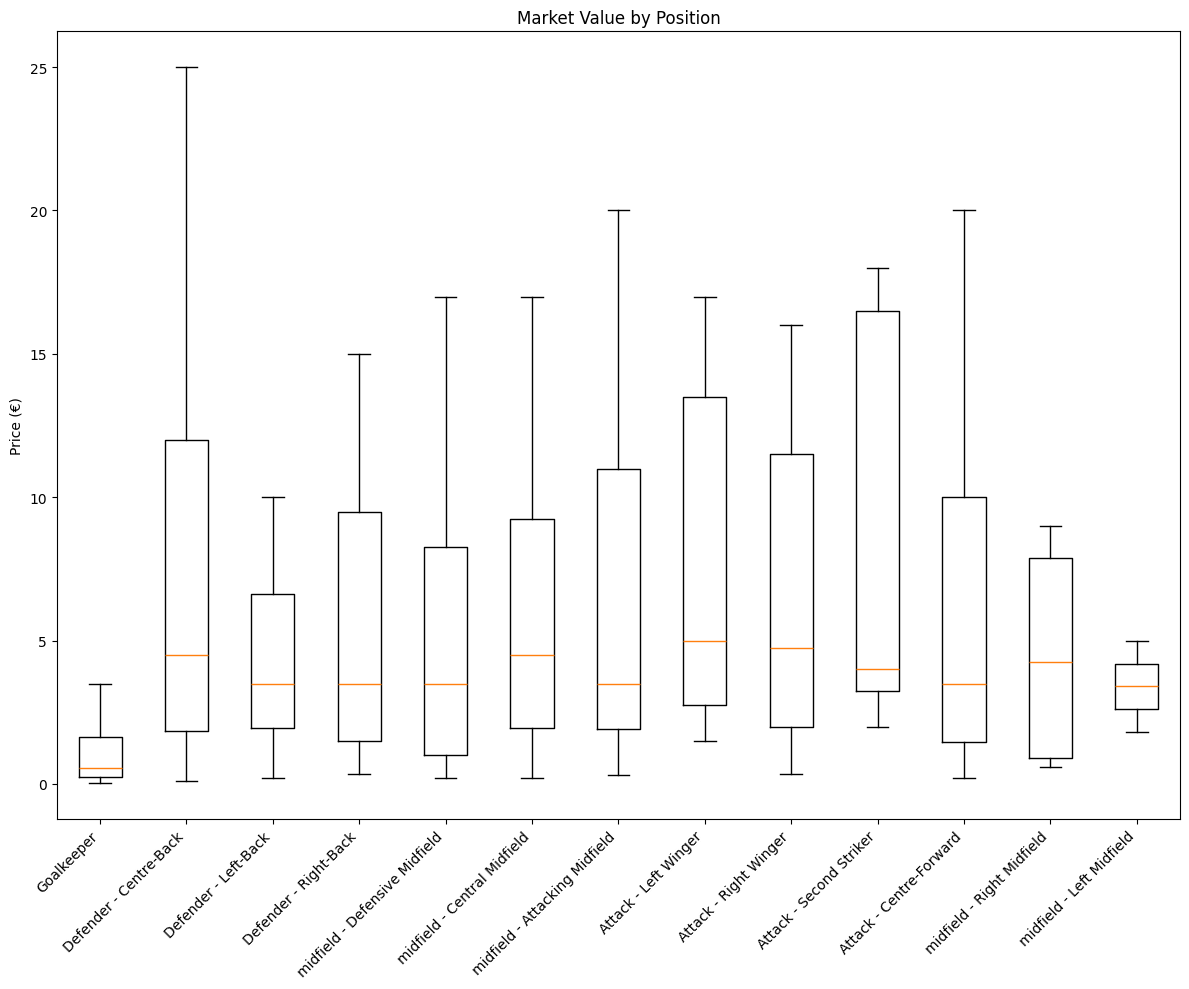

In [13]:
positions = df['position'].unique()
data = [df.loc[df['position']==pos, 'price_eur'] for pos in positions]

plt.figure(figsize=(12,6))
plt.boxplot(data, labels=positions, showfliers=False)
plt.xticks(rotation=45, ha='right')
plt.title("Market Value by Position")
plt.ylabel("Price (€)")
plt.tight_layout()
plt.show()


Figure 2: Market Value by Position 
Boxplots of € value for each role (forwards, midfielders, defenders, goalkeepers). This reveals which positions clubs invest in most heavily and how wide the value swings are (e.g. strikers vs. center-backs)

-I noticed how forwards have the highest median price but also the widest value spread.


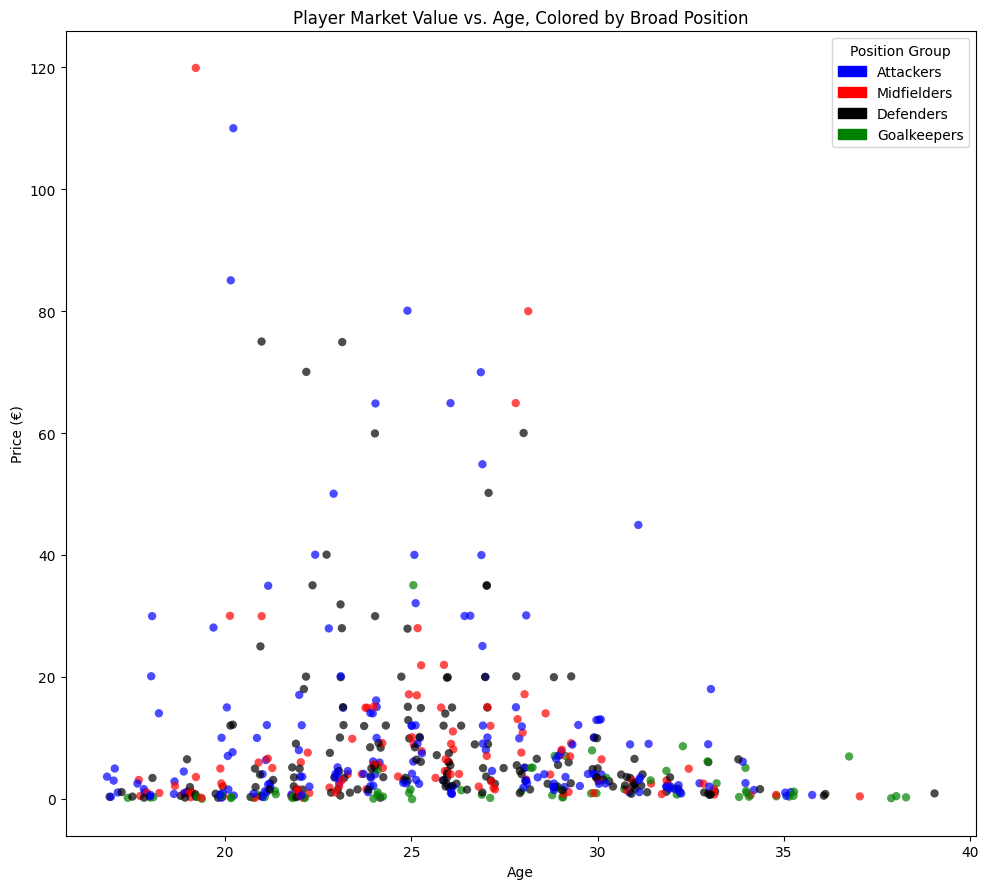

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches


def pos_to_color(pos):
    p = pos.lower()
    if 'forward' in p or 'wing' in p or 'attack' in p:
        return 'blue'
    elif 'midfield' in p:
        return 'red'
    elif 'defender' in p or 'back' in p:
        return 'black'
    elif 'keeper' in p or 'goal' in p:
        return 'green'
    else:
        return 'gray'


x = df['age'] + np.random.normal(0, 0.2, size=len(df))
y = df['price_eur'] + np.random.normal(0, df['price_eur'].std()*0.005, size=len(df))

colors = df['position'].apply(pos_to_color)

plt.figure(figsize=(10,9))
plt.scatter(x, y, c=colors, alpha=0.7, edgecolors='none')
plt.title("Player Market Value vs. Age, Colored by Broad Position")
plt.xlabel("Age")
plt.ylabel("Price (€)")

# 5) Legend
patches = [
    mpatches.Patch(color='blue', label='Attackers'),
    mpatches.Patch(color='red',   label='Midfielders'),
    mpatches.Patch(color='black', label='Defenders'),
    mpatches.Patch(color='green', label='Goalkeepers'),
]
plt.legend(handles=patches, title="Position Group")
plt.tight_layout()
plt.show()


Figure 3. Player Market Value vs. Age, Colored by Position Group  
This is a Scatter of age vs. value, with attackers in blue, midfielders red, defenders black, goalkeepers green. Jittering spreads overlapping points. In soccer terms, you can see at what ages each role peaks in market worth (e.g. young wingers vs. experienced keepers)


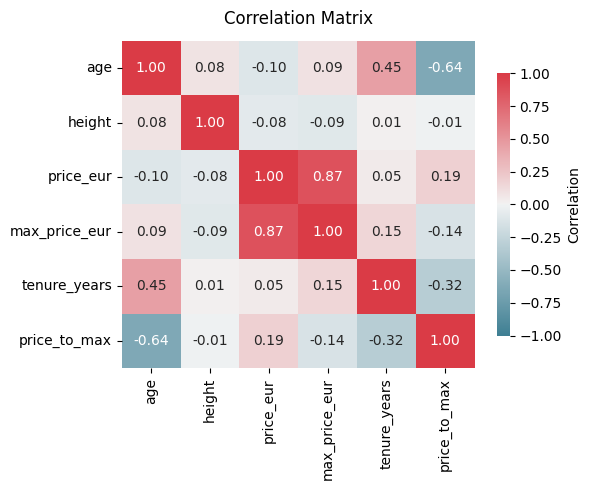

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation
num_cols = ['age','height','price_eur','max_price_eur','tenure_years','price_to_max']
corr = df[num_cols].corr()

# Plot with a custom diverging palette
plt.figure(figsize=(6,5))
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    vmin=-1, vmax=1,
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    center=0,
    cbar_kws={"shrink": .8, "label": "Correlation"}
)
plt.title("Correlation Matrix", pad=12)
plt.tight_layout()
plt.show()


Figure 4. Correlation Matrix of Key Features  
This heatmap showing how age, height, tenure, and value metrics interrelate. In soccer terms, it tells you—for instance whether longer‐tenured players tend to be older, or how closely current value tracks historical max price.

- For example: Tenure correlates ~0.5 with current value, while height barely correlates
